In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
mc = pd.read_csv('mc.csv', index_col='eid')
data = pd.read_csv('data.csv', index_col='eid')

In [3]:
# Global variables for plotting

# Change these if necessary:
run = 0 # = 0 for all runs
nbins_default = 100
normed_flag = False

# Shouldn't have to change these:
golden = (1 + 5 ** 0.5) / 2
figwidth = 8
fsize = 12
if run != 0:
    mc_weights = mc.loc[mc['run']==run].loc[:,'weight']
else:
    mc_weights = mc.loc[:,'weight']

In [4]:
def create_hist(var_name, plot_xrange=None, data_range=None, nbins=nbins_default):
    # Get the points to be plotted
    if run != 0:
        mc_points = mc.loc[mc['run']==run].loc[:,var_name]
        data_points = data.loc[data['run']==run].loc[:,var_name]
    else:
        mc_points = mc.loc[:,var_name]
        data_points = data.loc[:,var_name]
    
    # Apply cuts if requested
    if data_range:
        mc_points = [x for x in mc_points if x >= data_range[0] and x <= data_range[1]]
        data_points = [x for x in data_points if x >= data_range[0] and x <= data_range[1]]
        if run != 0: 
            mc_weights_cut = mc.loc[(mc['run']==run) & (mc[var_name] >= data_range[0]) & 
                                    (mc[var_name] <= data_range[1])].loc[:,'weight']
        else:
            mc_weights_cut = mc.loc[(mc[var_name] >= data_range[0]) & 
                                    (mc[var_name] <= data_range[1])].loc[:,'weight']
    
    # Define plot and figure
    fig = plt.figure(figsize=(figwidth*golden,figwidth))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    ax = fig.add_subplot(gs[0])
    
    # Plot data as points with error bars; save binning information
    data_counts, bin_edges = np.histogram(data_points, nbins, density=normed_flag)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    data_err = [x**0.5 for x in data_counts]
    ax.errorbar(bin_centers, data_counts, yerr=data_err, 
                fmt='o', mfc='black', ecolor='black', ms=4,
                label='Data')
    
    # Plot MC as a histogram
    if data_range:
        mc_counts,_,_ = ax.hist(mc_points, normed=normed_flag, bins=bin_edges, 
                            weights=mc_weights_cut, color='red', alpha=0.3, label='MC')
    else:
        mc_counts,_,_ = ax.hist(mc_points, normed=normed_flag, bins=bin_edges, 
                            weights=mc_weights, color='red', alpha=0.3, label='MC')
    
    # Make plot look nice
    ax.legend(prop={'size':fsize})
    ax.set_xlabel(var_name, fontsize=fsize)
    ax.set_ylabel('Counts', fontsize=fsize)
    ax.tick_params(length=8, width=1, labelsize=fsize)
    ax.set_xlim(plot_xrange)
    
    # Add subplot for MC-data difference
    ax2 = fig.add_subplot(gs[1])
    diff_counts = [(x-y)/float(x) for x,y in zip(data_counts, mc_counts)]
    diff_err = [np.sqrt(y*(x+y)/x**3) for x,y in zip(data_counts, mc_counts)]
    ax2.errorbar(bin_centers, diff_counts, color='black',
                 yerr=diff_err, fmt='.')
    
    # Make it look nice
    ax2.set_xlabel(var_name, fontsize=fsize)
    ax2.set_ylabel('Data - MC / Data', fontsize=fsize)
    ax2.tick_params(length=8, width=1, labelsize=fsize-1)
    ax2.axhline(0, color='black')
    ax2.set_xlim(plot_xrange)
    ymin, ymax = ax2.get_ylim()
    ymin, ymax = -1.*max([abs(ymin), abs(ymax)]), max([abs(ymin), abs(ymax)])
    ax2.set_ylim([ymin, ymax])
    
    return fig

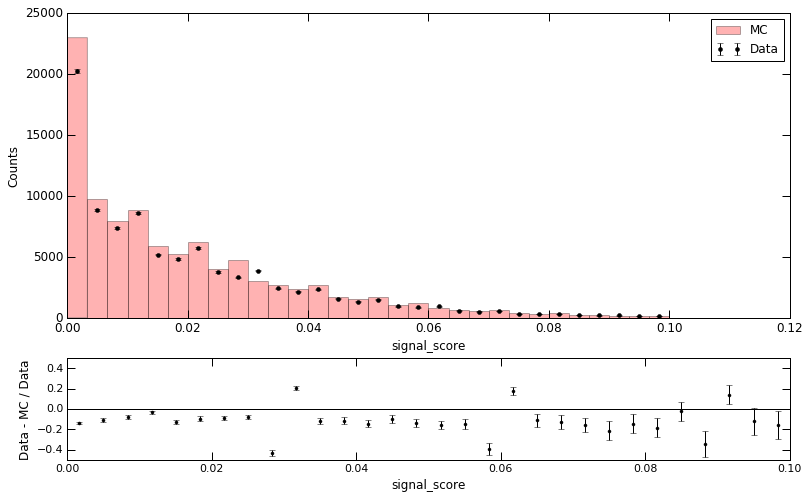

In [5]:
_ = create_hist('signal_score', nbins=30, data_range=[0,0.1])

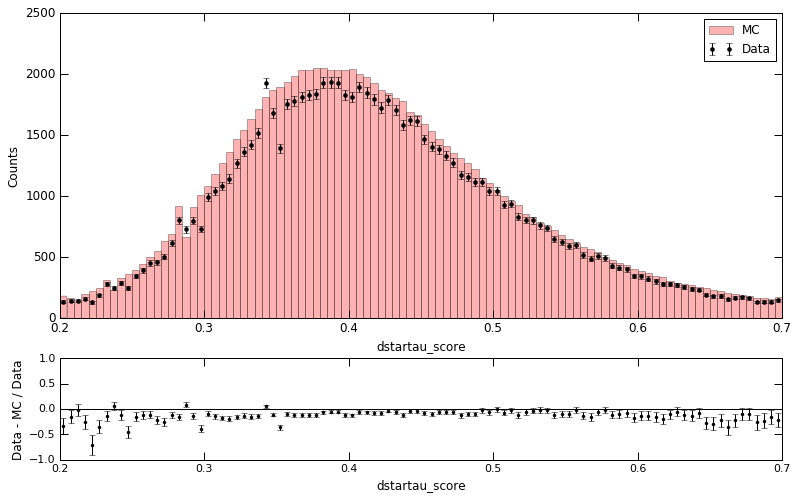

In [6]:
_ = create_hist('dstartau_score', data_range=[0.2,0.7])

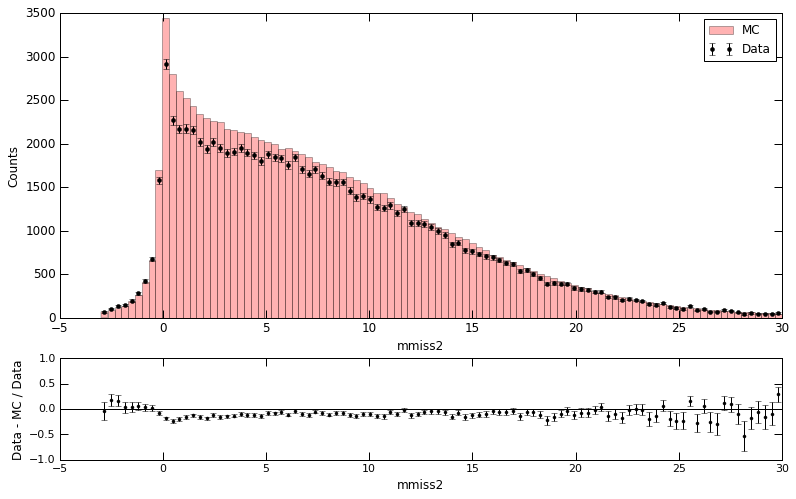

In [7]:
_ = create_hist('mmiss2', data_range=[-3,30])

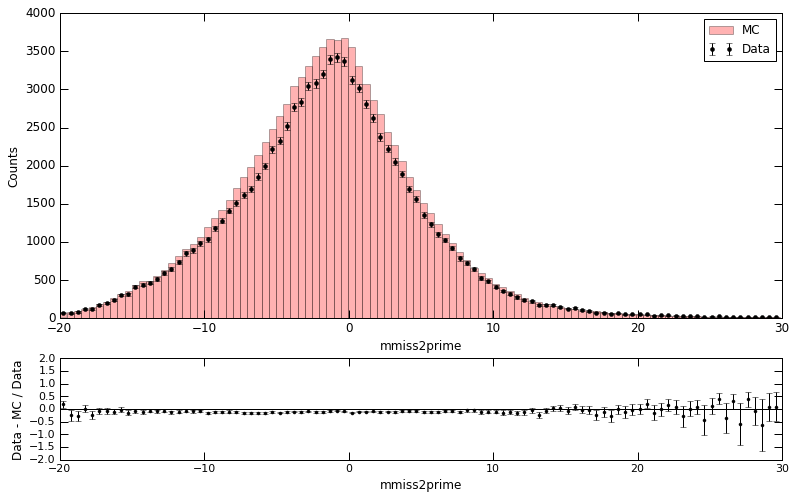

In [8]:
_ = create_hist('mmiss2prime', data_range=[-20,30])

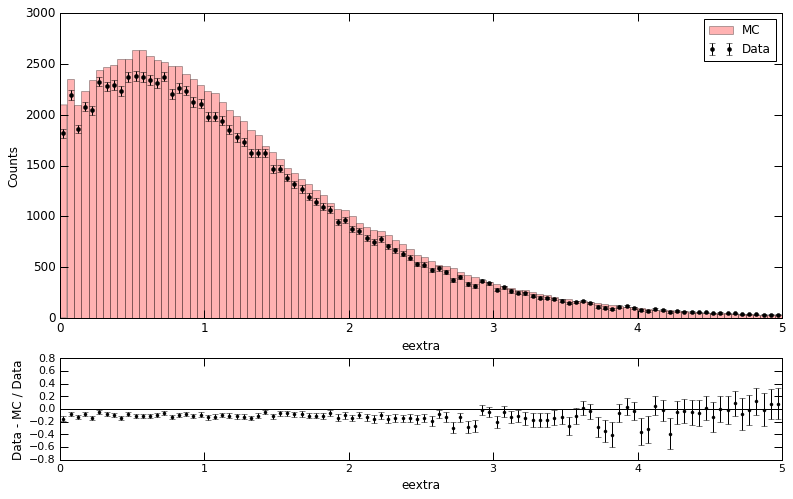

In [9]:
_ = create_hist('eextra', data_range=[0,5])

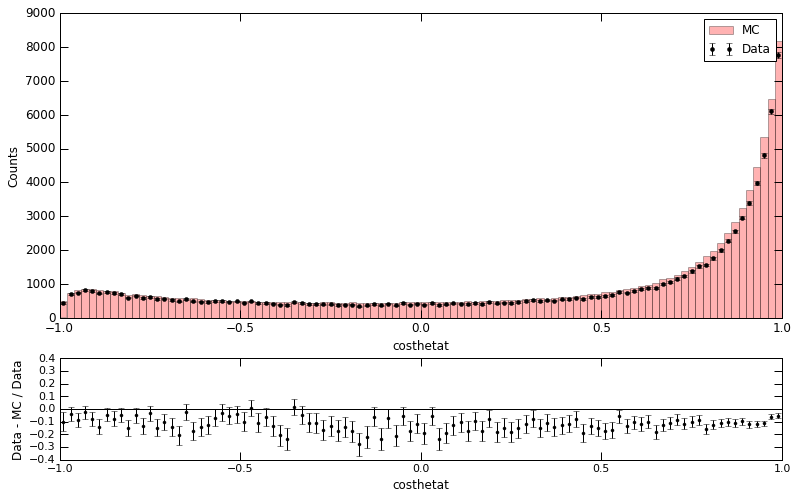

In [10]:
_ = create_hist('costhetat')

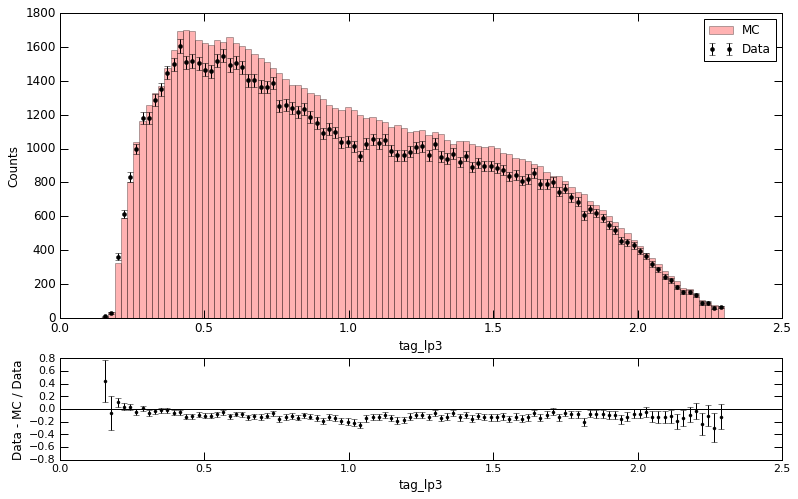

In [11]:
_ = create_hist('tag_lp3', data_range=[0,2.3])

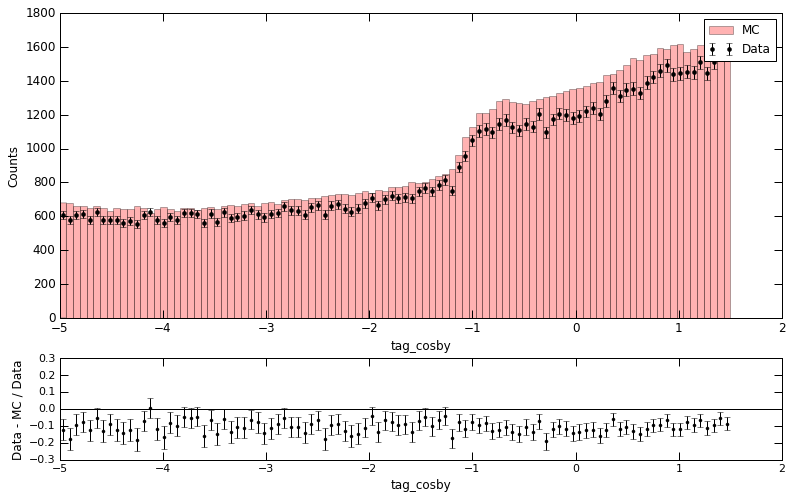

In [12]:
_ = create_hist('tag_cosby')

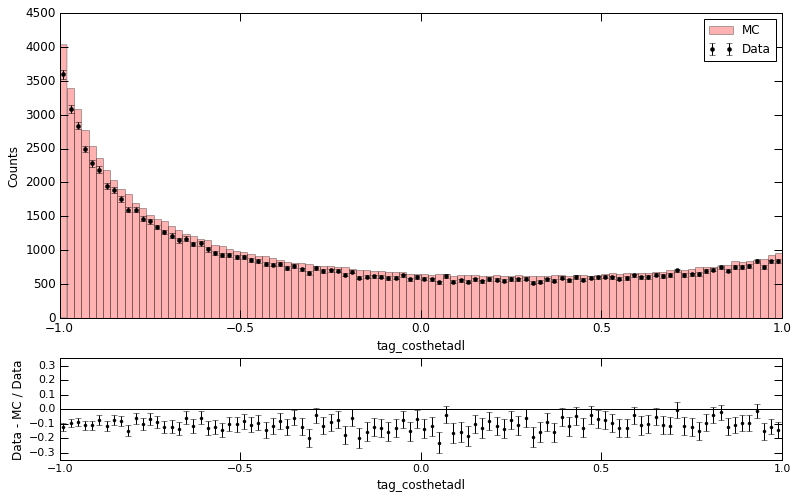

In [13]:
_ = create_hist('tag_costhetadl')

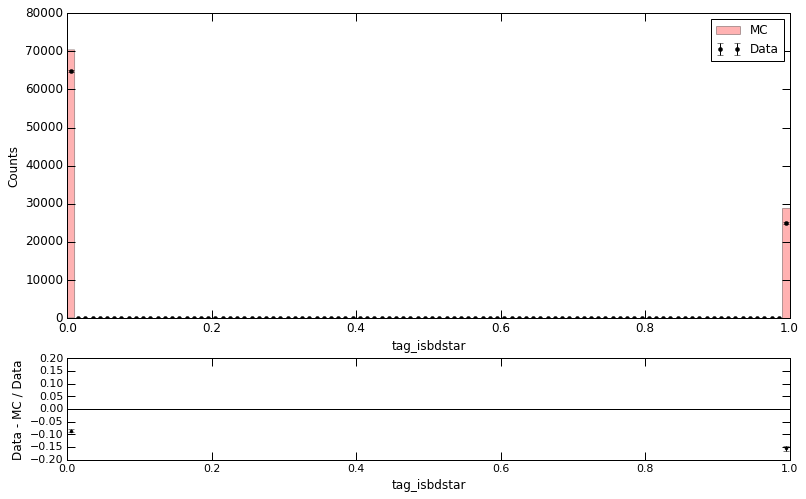

In [14]:
_ = create_hist('tag_isbdstar')

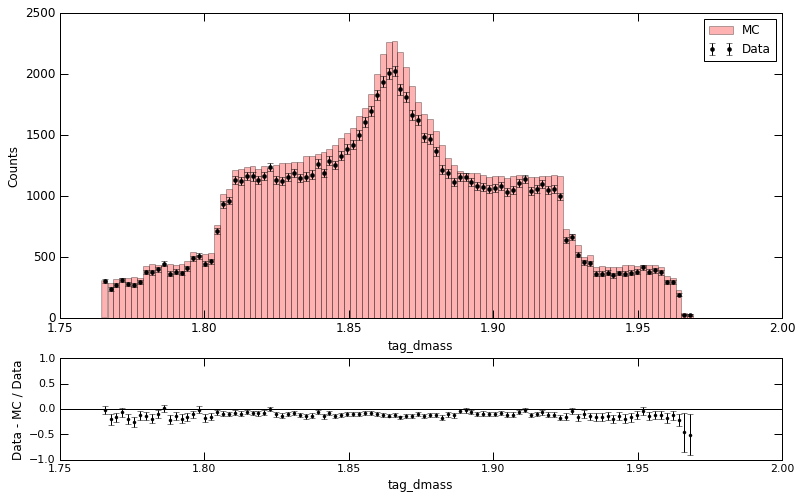

In [15]:
_ = create_hist('tag_dmass')

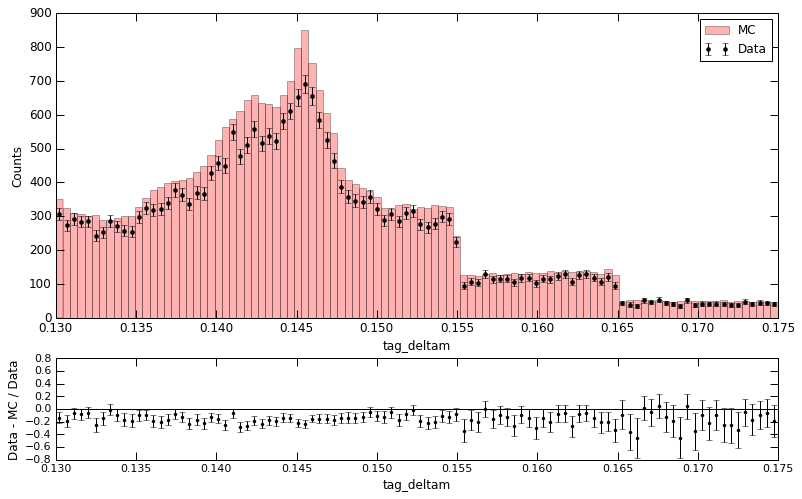

In [16]:
_ = create_hist('tag_deltam', data_range=[0,2])

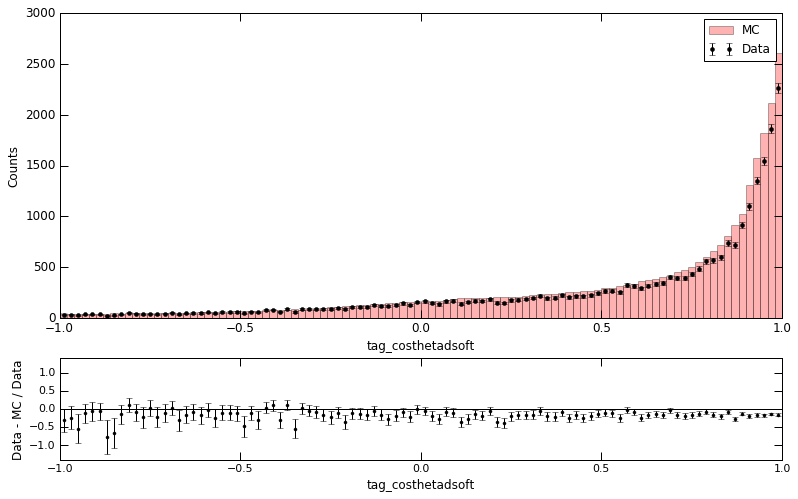

In [17]:
_ = create_hist('tag_costhetadsoft', data_range=[-1.1, 1.1])

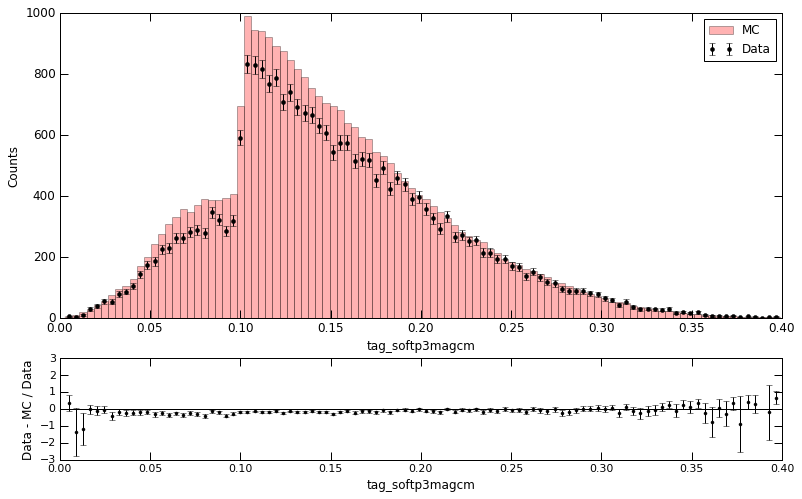

In [18]:
_ = create_hist('tag_softp3magcm', data_range=[-0.1, 1])

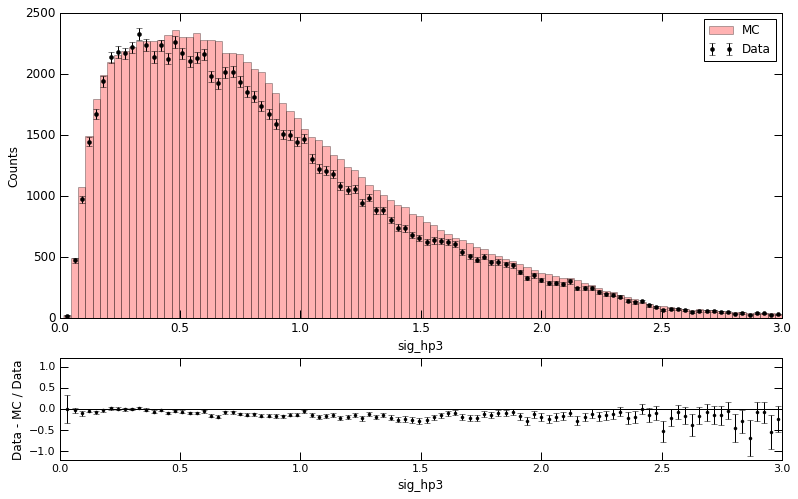

In [19]:
_ = create_hist('sig_hp3', data_range=[0,3])

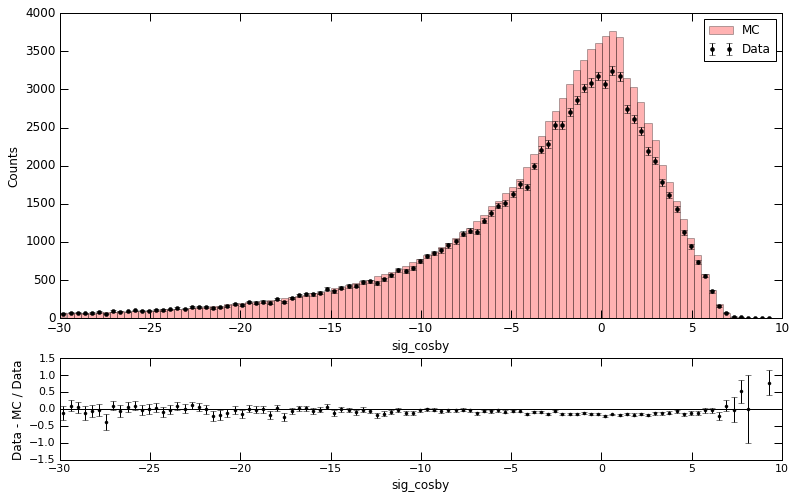

In [20]:
_ = create_hist('sig_cosby', data_range=[-30,50])

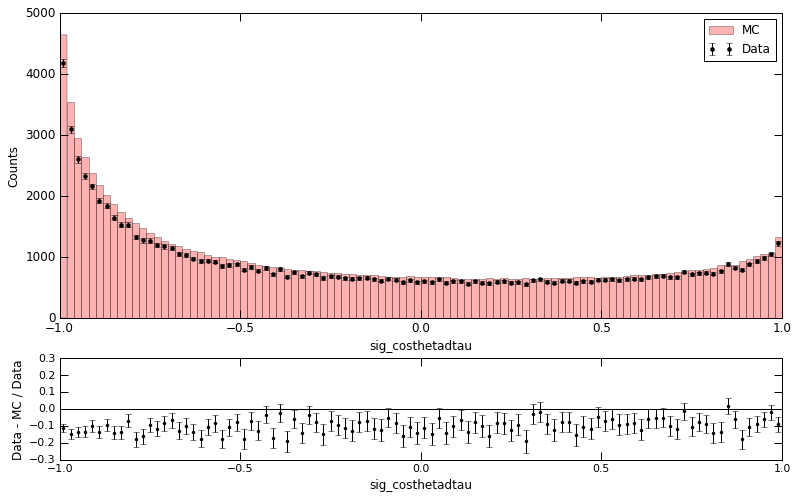

In [21]:
_ = create_hist('sig_costhetadtau')

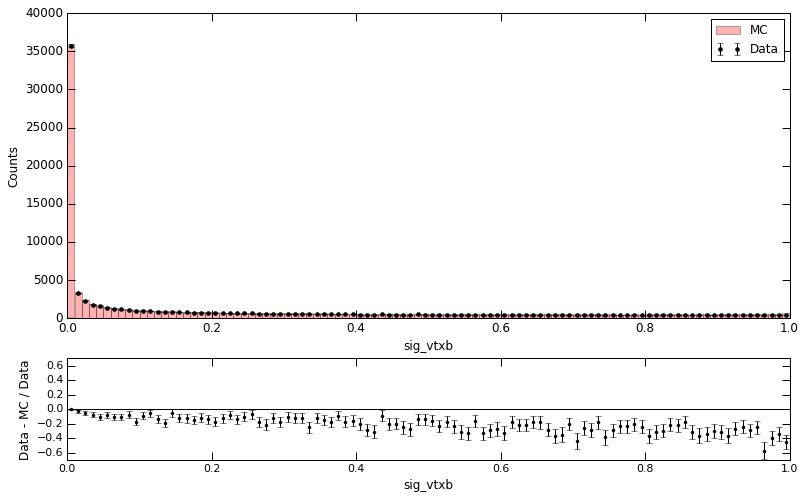

In [22]:
_ = create_hist('sig_vtxb')

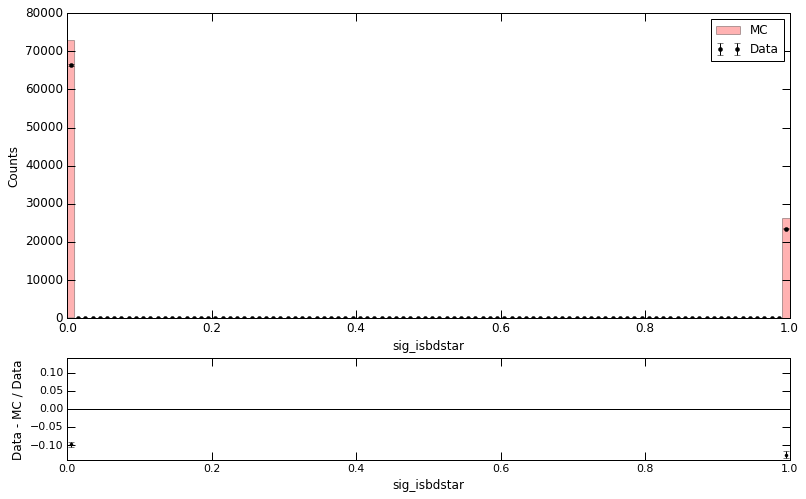

In [23]:
_ = create_hist('sig_isbdstar')

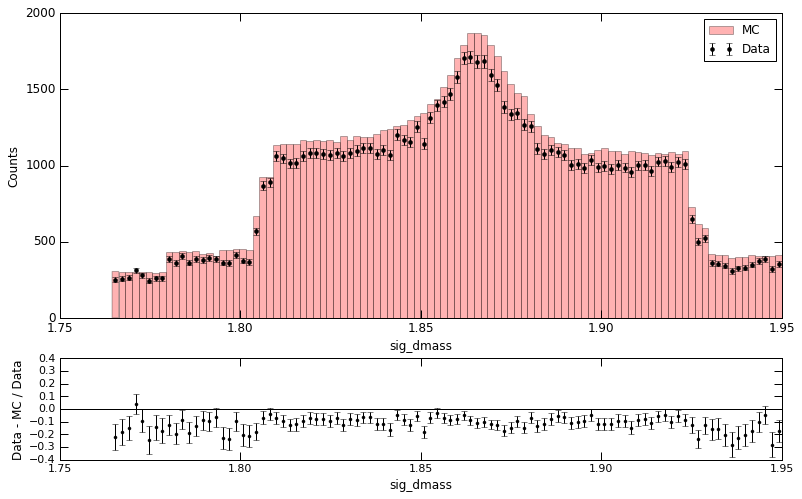

In [24]:
_ = create_hist('sig_dmass', data_range=[1.5,1.95])

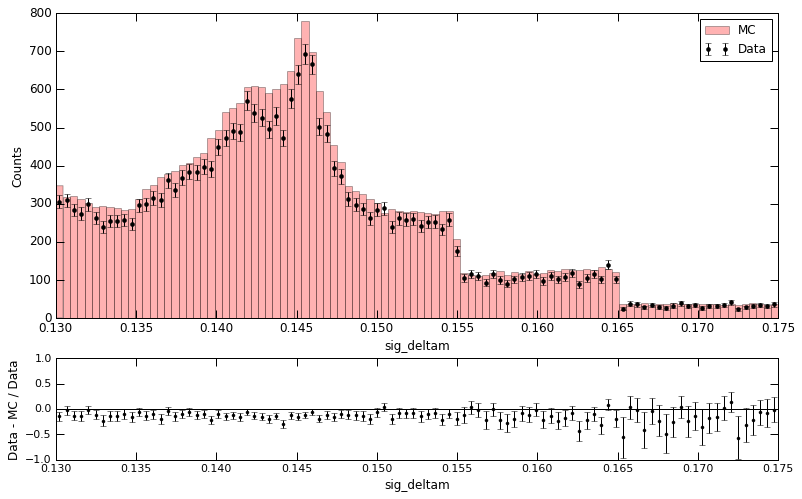

In [25]:
_ = create_hist('sig_deltam', data_range=[0, 1])

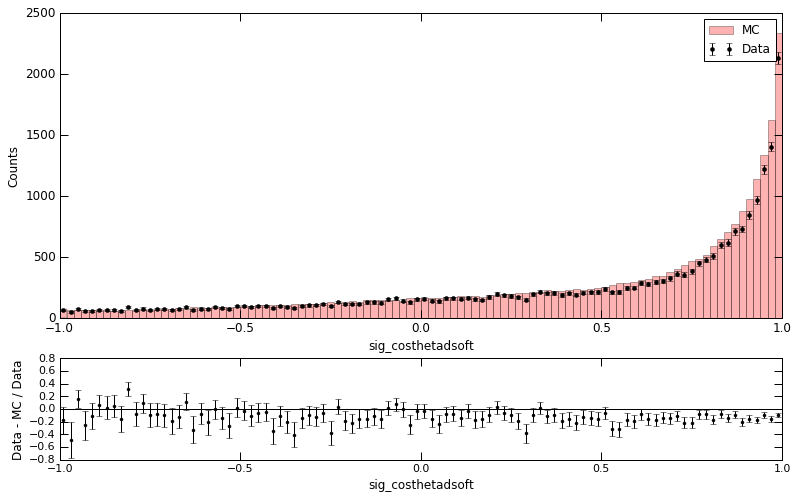

In [26]:
_ = create_hist('sig_costhetadsoft', data_range=[-1.1, 1])

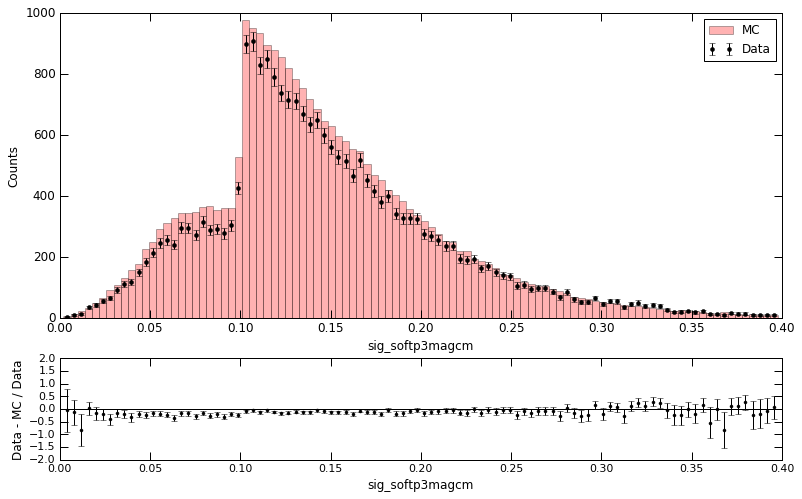

In [27]:
_ = create_hist('sig_softp3magcm', data_range=[-0.5,1])

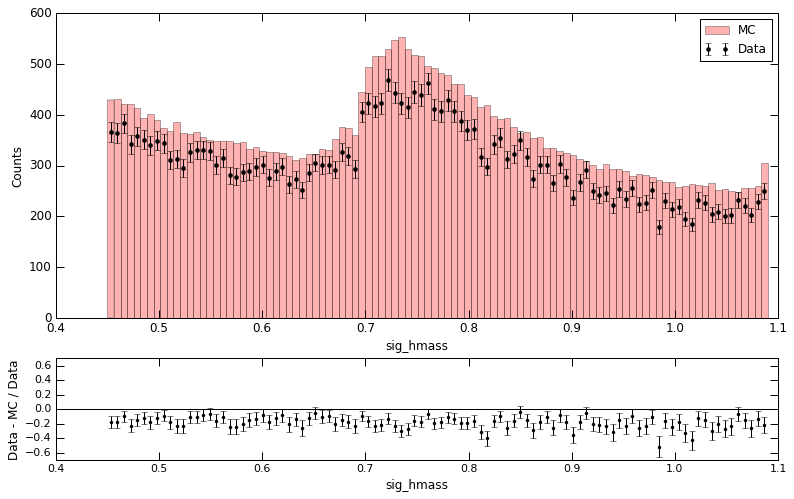

In [28]:
_ = create_hist('sig_hmass', data_range=[0,2])

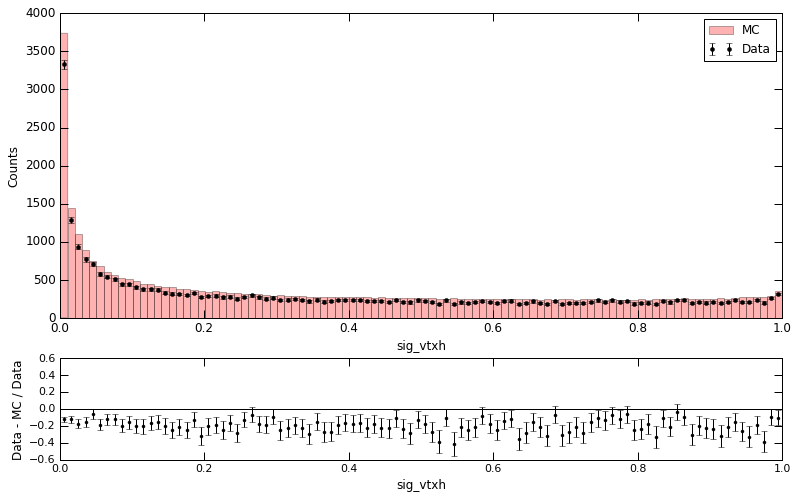

In [29]:
_ = create_hist('sig_vtxh', data_range=[-0.5,2])

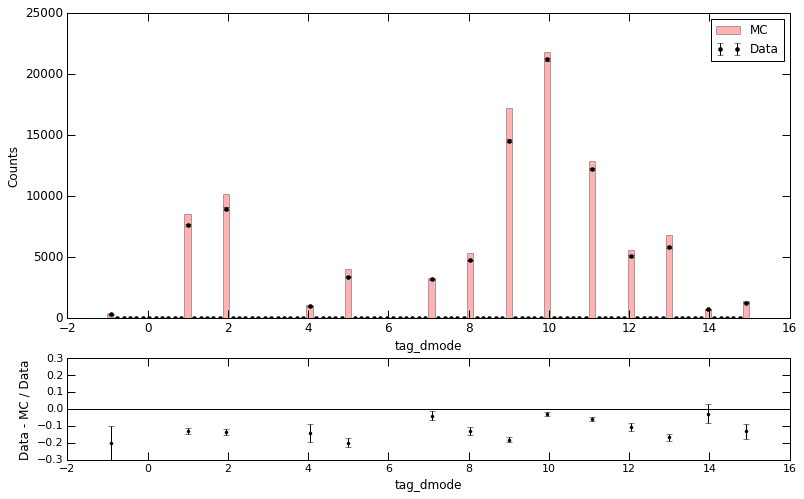

In [30]:
_ = create_hist('tag_dmode')

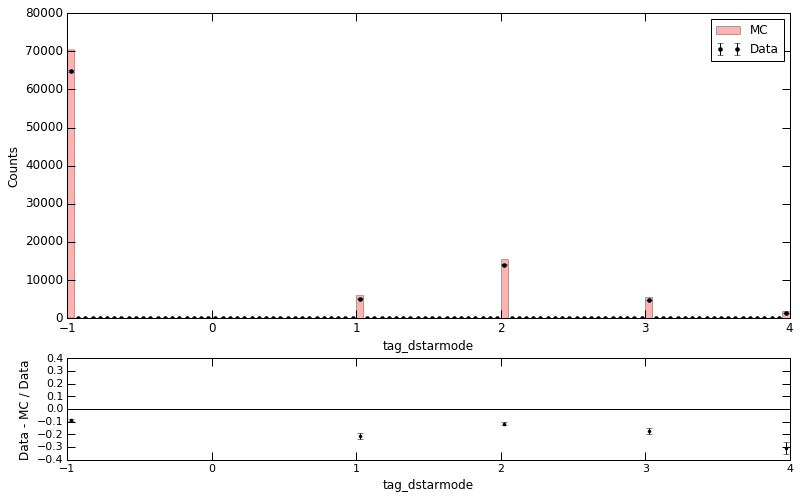

In [31]:
_ = create_hist('tag_dstarmode')

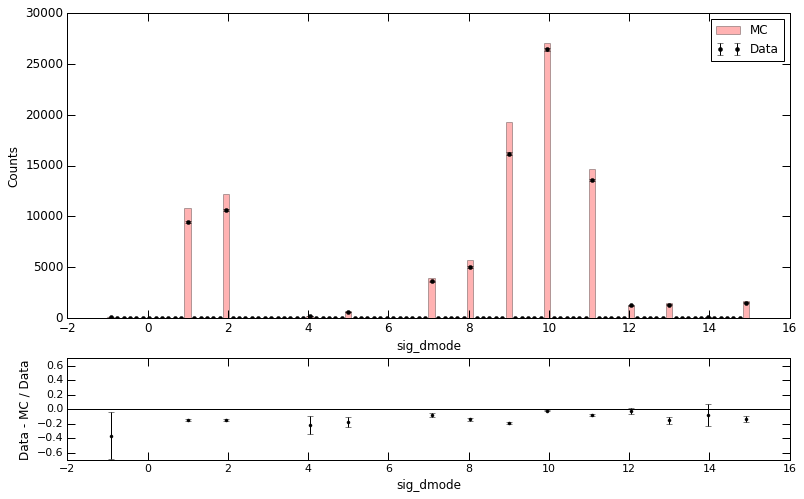

In [32]:
_ = create_hist('sig_dmode')

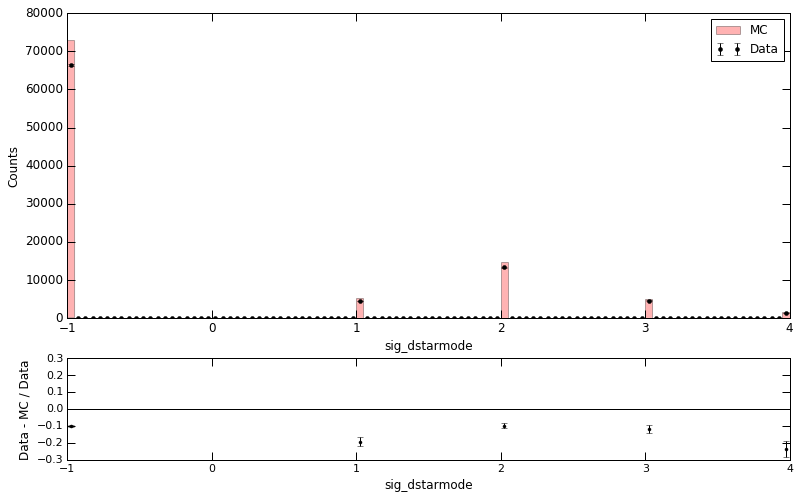

In [33]:
_ = create_hist('sig_dstarmode')

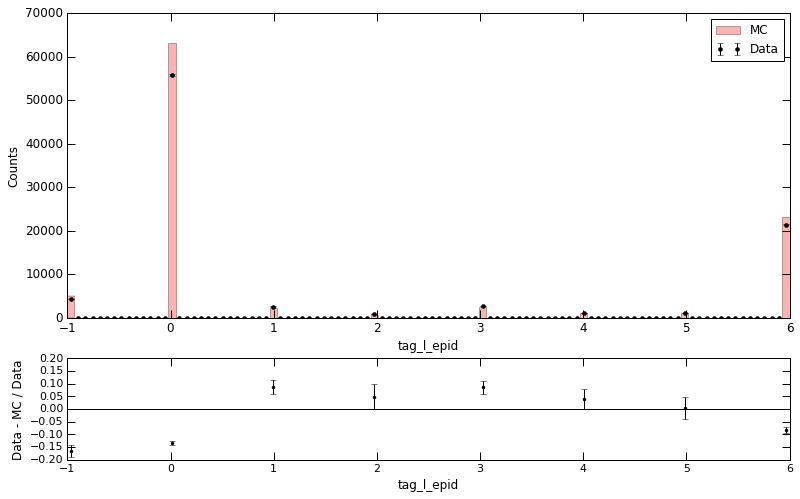

In [34]:
_ = create_hist('tag_l_epid')

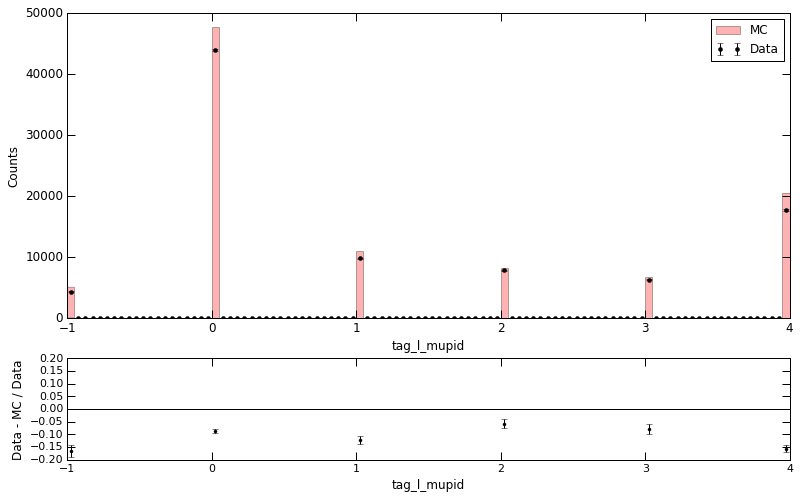

In [35]:
_ = create_hist('tag_l_mupid')

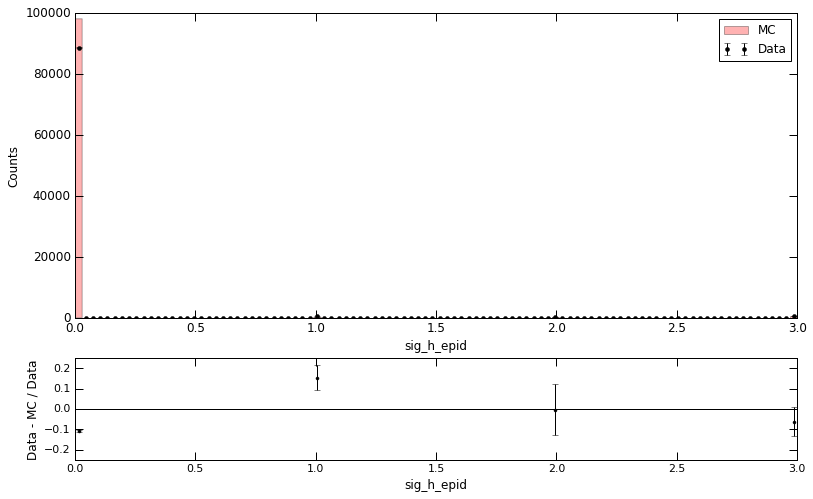

In [36]:
_ = create_hist('sig_h_epid')

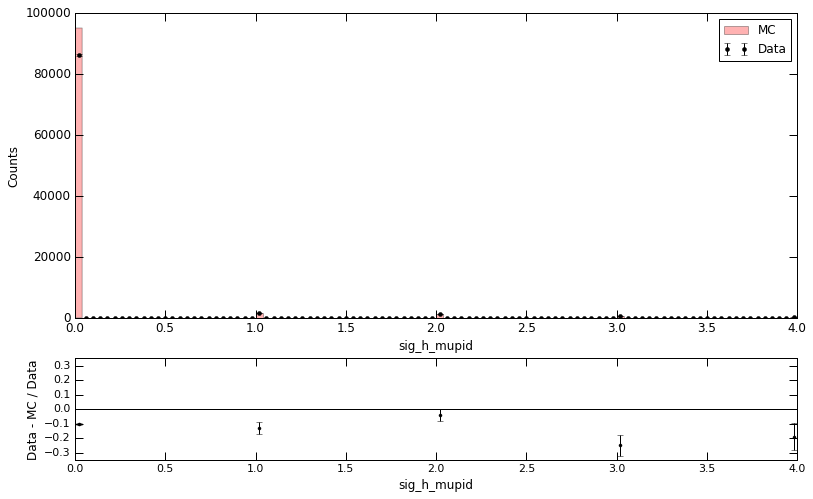

In [37]:
_ = create_hist('sig_h_mupid')

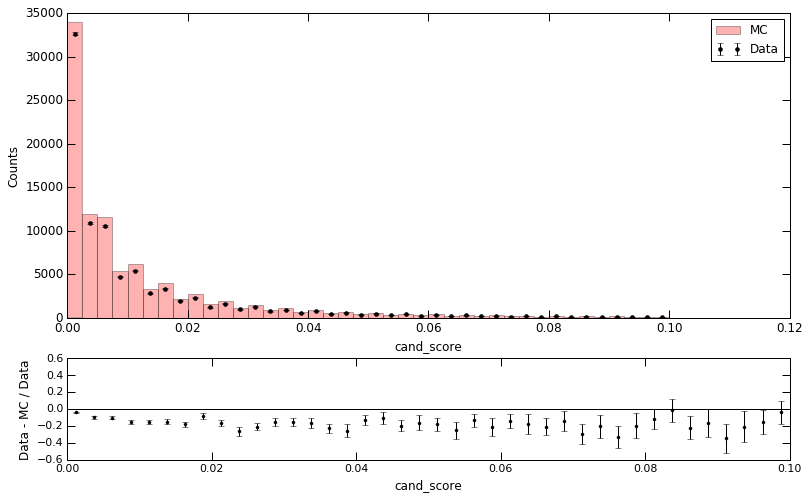

In [38]:
_ = create_hist('cand_score', data_range=[0,0.1], nbins=40)

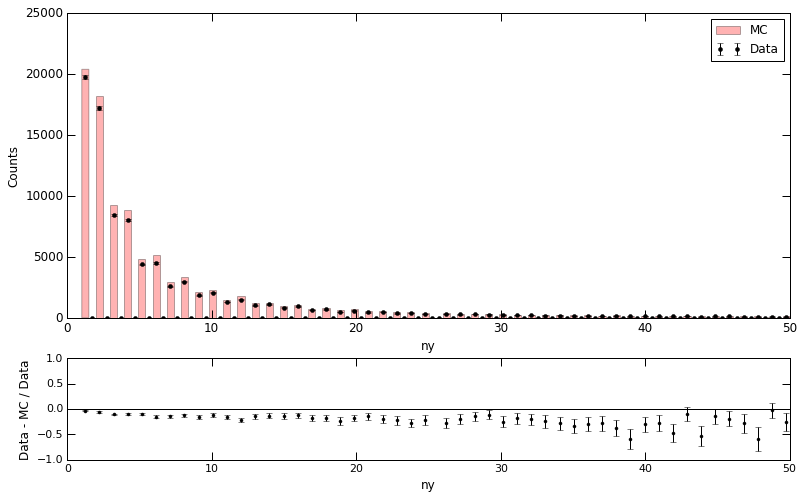

In [39]:
_ = create_hist('ny', data_range=[0,50])

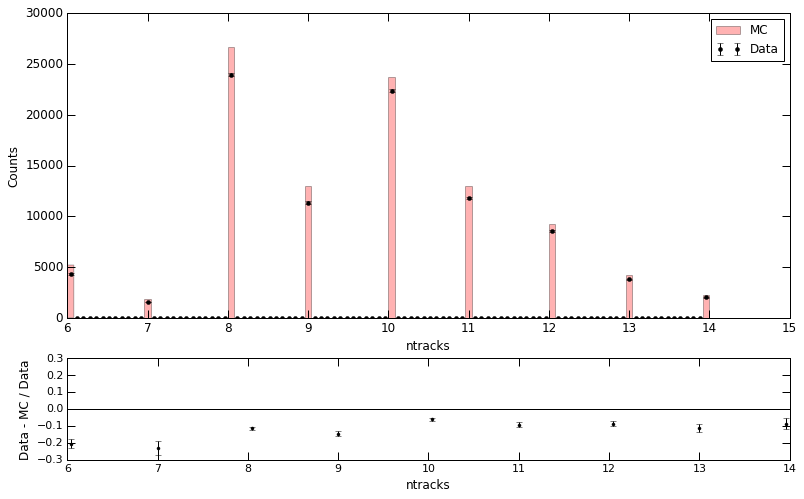

In [40]:
_ = create_hist('ntracks')

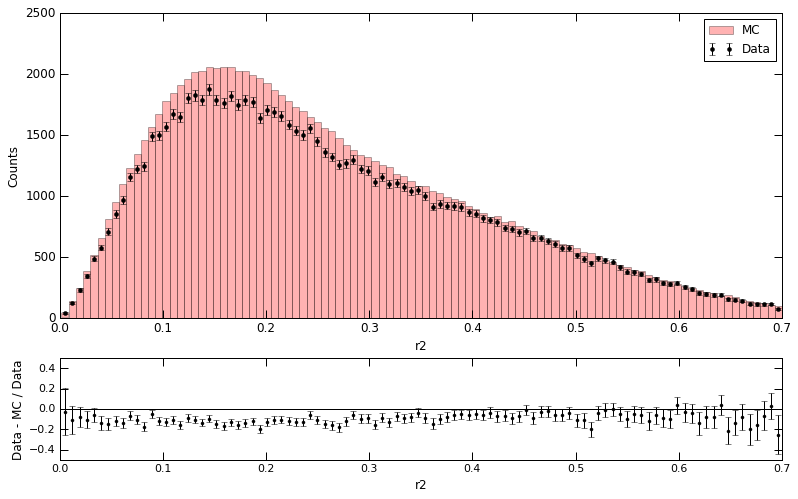

In [41]:
_ = create_hist('r2', data_range=[0,0.7])

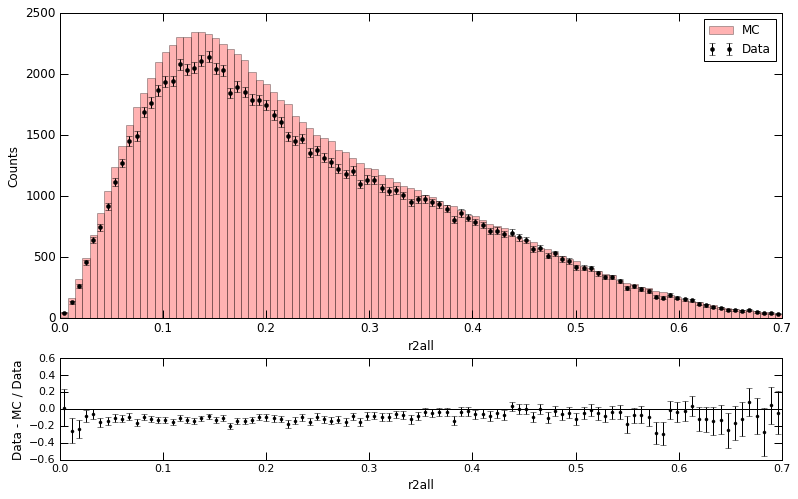

In [42]:
_ = create_hist('r2all', data_range=[0,0.7])